In [54]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [55]:
from collections import Counter

## 디올

In [56]:
mag_d = pd.read_csv('./magazine/final/magazine_d_stickword.csv', sep ='|', encoding = 'utf-8')

In [57]:
mag_d

,magazine,brand,title,link,date,word_dior,ADFN,ADFN_2
0,A,D,빈티지 쇼핑의 시대,http://www.allurekorea.com/2020/10/27/%eb%b9%8...,2020-10-27,"['그러니 빈티지 패션은, 어쩌면 나도 좋고 너도 좋은 일이다. 당시 사랑했던, 지...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',...","['빈티지', '패션', '좋', '느', '좋', '당시', '사랑', '사랑',..."
1,A,D,"주식을 시작한 패션 에디터의 이야기, 나는 주주다",http://www.allurekorea.com/2020/10/16/%ec%a3%b...,2020-10-16,[' 요즘 들어 주식은 친구들과의 대화에서 빼놓을 수 없는 주제가 되었다. 코로나...,"['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로...","['요즘', '주식', '친구', '과의', '대화', '빼놓', '주제', '코로..."
2,A,D,거리로 나온 하이패션 슈즈들 4,http://www.allurekorea.com/2020/09/16/%eb%a6%a...,2020-09-16,"[""['나이키의 조던 시리즈들 중에서도 역대급으로 평가받는 ‘에어 디올’은 부르는 ...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',...","['나이', '조', '덜', '시리즈', '역대', '급', '평가', '에어',..."
3,A,D,차정원부터 아이린까지. 옷 잘입는 셀럽들의 사복 패션에 등장한 뉴 백은 무엇?,http://www.allurekorea.com/2020/08/13/%ec%b0%a...,2020-08-13,['디올 레이디 디올 디올아무르 미니백 5백만원대'],"['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']","['DIOR', 'LADY', 'DIOR', 'DIOR', '아무르', '미니']"
4,A,D,DON’T CATEGORIZE ME / 유태오,http://www.allurekorea.com/2020/05/28/dont-cat...,2020-05-28,['실크 슬리브리스와 블랙 와이드 팬츠는 김서룡 옴므. 블랙 부츠는 보테가 베네타....,"['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '...","['실크', '슬리브리스', '블랙', '와이드', '팬츠', '김', '룡', '..."
...,...,...,...,...,...,...,...,...
1754,W,D,가을의 하이킹,http://www.wkorea.com/2016/09/05/%ea%b0%80%ec%...,2016-09-05,['6. 주얼 장식과 앙증맞은 리본이 반전의 매력을 더하는 부츠는 디올 제품. 1백...,"['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI...","['얼', '장식', '앙증맞', '리본', '반전', '매력', '부츠', 'DI..."
1755,W,D,W해시태그,http://www.wkorea.com/2016/09/02/w%ed%95%b4%ec...,2016-09-02,"['#W뷰티콕 (뷰티 디렉터 송시은)\\n조회 2,023회\\n너무나 뜨거운 여름...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',...","['W', '뷰티', '콕', '뷰티', '디렉터', '송', '시은', '조회',..."
1756,W,D,마법의 색,http://www.wkorea.com/2016/09/02/%eb%a7%88%eb%...,2016-09-02,"[""'크리스찬 디올에게 초록은 곧 ‘자연’을, 빨강은 ‘생명’을, 분홍은 ‘감미로움...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ...","['CHRISTIAN', 'DIOR', '초록', '자연', '빨강', '생명', ..."
1757,W,D,따로 또 같이,http://www.wkorea.com/2016/09/02/%eb%94%b0%eb%...,2016-09-02,"['자수 장식 슈트, 실크 셔츠에 리본 타이를 연출한 구찌, 남성다운 검정 테일러드...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성...","['자수', '장식', '슈트', '실크', '셔츠', '리본', '타이', '남성..."


In [58]:
mag_d['word'] = mag_d['word_dior']

In [59]:
mag_D = mag_d[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [60]:
len(mag_D)

1759

### 5

In [61]:
idx5 = []
for i in range(len(mag_D)):
    if i % 5 == 0 :
        idx5.append(i)

In [62]:
mag_D5 = mag_D.loc[idx5]

In [63]:
mag_D5.reset_index(drop = True, inplace = True)

### 4

In [93]:
idx4 = []
for i in range(len(mag_D)):
    if i % 4 == 0 :
        idx4.append(i)

In [94]:
mag_D4 = mag_D.loc[idx4]

In [95]:
mag_D4.reset_index(drop = True, inplace = True)

## 제니

### 제니 (유튜브 + 매거진)

In [46]:
tot_je = pd.read_csv('./magazine/final/video_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [47]:
tot_je['word'] = tot_je['word_jenny']

In [48]:
tot_JE = tot_je[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [49]:
len(tot_JE)

351

### 셀린느 + 제니

In [64]:
D5JE = pd.concat([mag_D5, tot_JE])

In [65]:
D5JE.reset_index(drop = True, inplace = True)

In [66]:
D5JE.to_csv('./magazine/final/D5JE.csv', sep = '|', encoding = 'utf-8', index = False)

In [67]:
len(D5JE)

703

In [96]:
D4JE = pd.concat([mag_D4, tot_JE])

In [97]:
D4JE.reset_index(drop = True, inplace = True)

In [98]:
D4JE.to_csv('./magazine/final/D4JE.csv', sep = '|', encoding = 'utf-8', index = False)

In [99]:
len(D4JE)

791

## stopword 추가

In [68]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [69]:
sw_df.columns = ['stopword']

In [70]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [71]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [72]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [73]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해']
for w in add_0:
    stop_words.append(w)

In [74]:
add_1 = ['BLACKPINK', '리사', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [75]:
add_2 = []
for w in add_1:
    stop_words.append(w)

In [76]:
len(stop_words)

829

In [100]:
D4JE['ADFN_2'] = D4JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [101]:
noun_adj_list = []
for i in range(len(D4JE)):
    for word in D4JE.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [102]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9276), ('귀엽다', 2144), ('예쁘다', 1817), ('DIOR', 1227), ('사랑', 854), ('얼굴', 687), ('패션', 511), ('무대', 501), ('노래', 488), ('매력', 450), ('옷', 409), ('잘', 408), ('아이돌', 381), ('스타일', 365), ('컬렉션', 340), ('젠득', 321), ('룩', 314), ('여자', 312), ('컬러', 306), ('느낌', 305), ('팬', 300), ('CHANEL', 290), ('실력', 284), ('영어', 270), ('눈', 253), ('드레스', 248), ('브랜드', 242), ('걸', 239), ('처음', 238), ('앞머리', 238), ('머리', 222), ('예능', 209), ('티', 207), ('랩', 207), ('헤어', 200), ('최고', 199), ('모습', 198), ('춤', 193), ('블랙', 192), ('백', 191), ('목소리', 185), ('분위기', 184), ('쇼', 183), ('표정', 182), ('고급', 178), ('여성', 178), ('의상', 175), ('공주', 175), ('멤버', 175), ('모델', 173), ('좋은', 173), ('디자이너', 172), ('발음', 172), ('장식', 171), ('연예인', 171), ('자체', 169), ('라이브', 168), ('한국', 166), ('치마', 165), ('포인트', 153), ('세상', 152), ('팬츠', 150), ('재킷', 149), ('입덕', 149), ('레드', 141), ('인간', 137), ('제일', 137), ('좋다', 137), ('라인', 134), ('스타', 133), ('DESIGN', 133), ('아이템', 133), ('썸네일', 133), ('시즌', 130), ('애기', 130), ('스타

In [103]:
count = Counter(noun_adj_list)

In [104]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('제니', 9276)
('귀엽다', 2144)
('예쁘다', 1817)
('DIOR', 1227)
('사랑', 854)
('얼굴', 687)
('패션', 511)
('무대', 501)
('노래', 488)
('매력', 450)
('옷', 409)
('잘', 408)
('아이돌', 381)
('스타일', 365)
('컬렉션', 340)
('젠득', 321)
('룩', 314)
('여자', 312)
('컬러', 306)
('느낌', 305)
('팬', 300)
('CHANEL', 290)
('실력', 284)
('영어', 270)
('눈', 253)
('드레스', 248)
('브랜드', 242)
('걸', 239)
('처음', 238)
('앞머리', 238)
('머리', 222)
('예능', 209)
('티', 207)
('랩', 207)
('헤어', 200)
('최고', 199)
('모습', 198)
('춤', 193)
('블랙', 192)
('백', 191)
('목소리', 185)
('분위기', 184)
('쇼', 183)
('표정', 182)
('고급', 178)
('여성', 178)
('의상', 175)
('공주', 175)
('멤버', 175)
('모델', 173)
('좋은', 173)
('디자이너', 172)
('발음', 172)
('장식', 171)
('연예인', 171)
('자체', 169)
('라이브', 168)
('한국', 166)
('치마', 165)
('포인트', 153)
('세상', 152)
('팬츠', 150)
('재킷', 149)
('입덕', 149)
('레드', 141)
('인간', 137)
('제일', 137)
('좋다', 137)
('라인', 134)
('스타', 133)
('DESIGN', 133)
('아이템', 133)
('썸네일', 133)
('시즌', 130)
('애기', 130)
('스타일링', 128)
('연출', 128)
('레전드', 127)
('외모', 126)
('화이트', 123)
('쿠마', 122)
('완성

In [105]:
top500 = pd.DataFrame(word_list)

In [106]:
top500.columns = ['word', 'count']

In [107]:
top500.to_csv('./D4JE_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [85]:
import matplotlib.pyplot as plt

In [86]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [87]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [88]:
from wordcloud import WordCloud

In [108]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

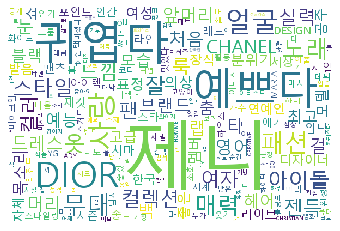

In [109]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('wc_D4JE_top500.png')

In [110]:
D4JE.to_csv('./magazine/final/D4JE_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)